In [9]:
import pandas as pd
import numpy as np

class LinearRegressionGD(object):
    def __init__(self, fit_intercept=True, copy_X=True,
                 eta0=0.001, epochs=1000, batch_size = 1, 
                 weight_decay=0.9, shuffle = True):
        self.fit_intercept = fit_intercept
        self.copy_X = copy_X
        self._eta0 = eta0
        self._epochs = epochs

        self._cost_history = []

        self._coef = None
        self._intercept = None
        self._new_X = None
        self._w_history = None
        self._weight_decay = weight_decay
        self._batch_size = batch_size
        self._is_SGD = shuffle

    def gradient(self, X, y, theta):
        return X.T.dot(self.hypothesis_function(X, theta)-y) / len(X)

    def fit(self, X, y):
        self._new_X = np.array(X)  # X 데이터 할당
        y = y.reshape(-1, 1)

        if self.fit_intercept:    # intercept 추가 여부
            # 1로만 구성된 상수항을 모든 데이터를 추가
            intercept_vector = np.ones([len(self._new_X), 1])
            self._new_X = np.concatenate(
                    (intercept_vector, self._new_X), axis=1)

        theta_init = np.random.normal(0, 1, self._new_X.shape[1])         
        # weight값 초기화
        self._w_history = [theta_init]
        self._cost_history = [self.cost(
                        self.hypothesis_function(self._new_X, theta_init), y)]

        theta = theta_init

        for epoch in range(self._epochs): # 지정된 epoch의 값만큼 학습 실행
            X_copy = np.copy(self._new_X)

            if self._is_SGD:   # stochastic 적용 여부
                np.random.shuffle(X_copy)

            batch = len(X_copy) // self._batch_size 
            # batch 사이즈를 기준으로 전체데이터를 나눔

            for batch_count  in range(batch):
                X_batch = np.copy(   # BATCH 사이즈를 기준으로 데이터를 slice
                            X_copy[batch_count * self._batch_size : (batch_count+1) & self._batch_size])

                gradient = self.gradient(X_batch  , y, theta).flatten()
                theta = theta - self._eta0 * gradient

            if epoch % 100 == 0:
                self._w_history.append(theta)
                cost = self.cost(
                    self.hypothesis_function(self._new_X, theta), y)
                self._cost_history.append(cost)
            self._eta0 = self._eta0 * self._weight_decay

        if self.fit_intercept:
            self._intercept = theta[0]
            self._coef = theta[1:]
        else:
            self._coef = theta
    def cost(self, h, y):
        return 1/(2*len(y)) * np.sum((h-y).flatten() ** 2)

    def hypothesis_function(self, X, theta):
        return X.dot(theta).reshape(-1, 1)

    def gradient(self, X, y, theta):
        return X.T.dot(self.hypothesis_function(X, theta)-y) / len(X)

    def fit(self, X, y):
        self._new_X = np.array(X)
        y = y.reshape(-1, 1)

        if self.fit_intercept:
            intercept_vector = np.ones([len(self._new_X), 1])
            self._new_X = np.concatenate(
                    (intercept_vector, self._new_X), axis=1)

        theta_init = np.random.normal(0, 1, self._new_X.shape[1])
        self._w_history = [theta_init]
        self._cost_history = [self.cost(
                        self.hypothesis_function(self._new_X, theta_init), y)]

        theta = theta_init

        for epoch in range(self._epochs):
            gradient = self.gradient(self._new_X, y, theta).flatten()
            theta = theta - self._eta0 * gradient

            if epoch % 100 == 0:
                self._w_history.append(theta)
                cost = self.cost(
                    self.hypothesis_function(self._new_X, theta), y)
                self._cost_history.append(cost)
            self._eta0 = self._eta0 * self._weight_decay

        if self.fit_intercept:
            self._intercept = theta[0]
            self._coef = theta[1:]
        else:
            self._coef = theta

    def predict(self, X):
        test_X = np.array(X)

        if self.fit_intercept:
            intercept_vector = np.ones([len(test_X), 1])
            test_X = np.concatenate(
                    (intercept_vector, test_X), axis=1)

            weights = np.concatenate(([self._intercept], self._coef), axis=0)
        else:
            weights = self._coef

        return test_X.dot(weights)

    @property
    def coef(self):
        return self._coef

    @property
    def intercept(self):
        return self._intercept

    @property
    def weights_history(self):
        return np.array(self._w_history)

    @property
    def cost_history(self):
        return self._cost_history

In [10]:
import pandas as pd
import numpy as np

df = pd.read_csv("ch08/train.csv")

X = df["x"].values.reshape(-1,1)
y = df["y"].values

gd_lr = LinearRegressionGD(eta0=0.001, epochs=10000, batch_size=1, shuffle=False)
bgd_lr = LinearRegressionGD(eta0=0.001, epochs=10000, batch_size=len(X), shuffle=False)
sgd_lr = LinearRegressionGD(eta0=0.001, epochs=10000, batch_size=1, shuffle=True)
msgd_lr = LinearRegressionGD(eta0=0.001, epochs=10000, batch_size=100, shuffle=True)

In [11]:
gd_lr.fit(X, y)
bgd_lr.fit(X, y)
sgd_lr.fit(X,y)
msgd_lr.fit(X,y)

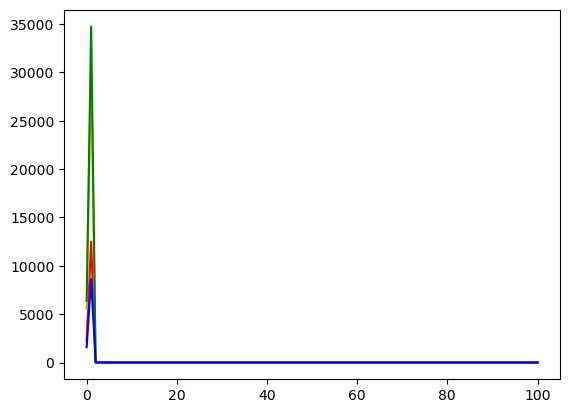

In [12]:
import matplotlib.pyplot as plt

plt.plot(range(len(gd_lr.cost_history)), gd_lr.cost_history, c="r")
plt.plot(range(len(bgd_lr.cost_history)), bgd_lr.cost_history, c="y")
plt.plot(range(len(sgd_lr.cost_history)), sgd_lr.cost_history, c="g")
plt.plot(range(len(msgd_lr.cost_history)), msgd_lr.cost_history, c="b")

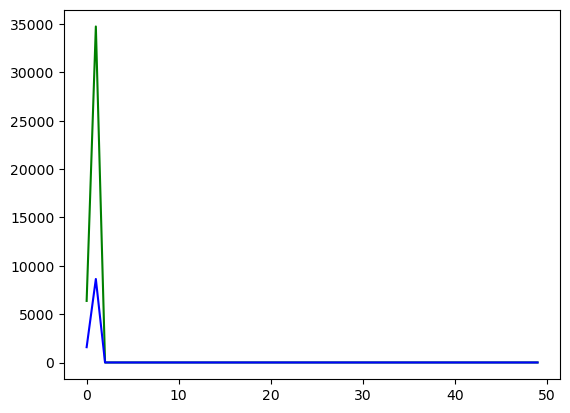

In [13]:
plt.plot(range(50), sgd_lr.cost_history[:50], c="g")
plt.plot(range(50), msgd_lr.cost_history[:50], c="b")

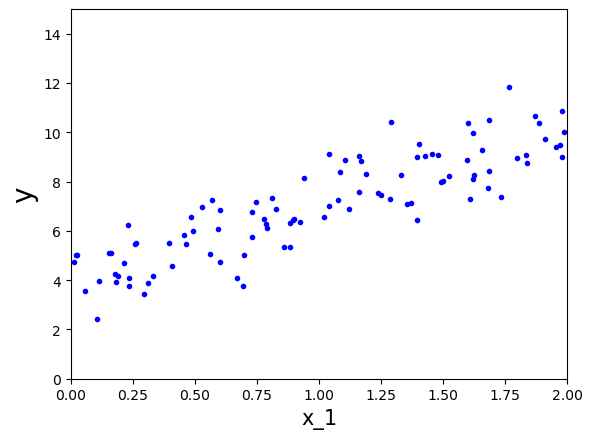

In [49]:
import numpy as np

X = 2 * np.random.rand(100, 1)
y = 4 + 3 * X + np.random.randn(100,1)

plt.plot(X, y, "b.")
plt.xlabel("x_1", fontsize = 15)
plt.ylabel("y", fontsize=20)
plt.axis([0, 2, 0, 15])
plt.show()

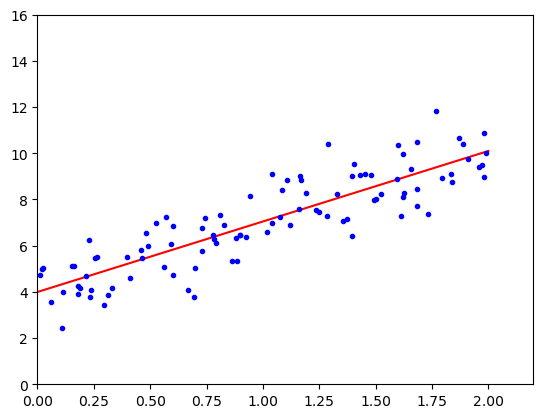

In [93]:
#노말 이퀘이션
x_normal = np.c_[np.ones((100, 1)), X]
theta_best = np.linalg.inv(x_normal.T.dot(x_normal)).dot(x_normal.T).dot(y)
theta_best

x_new = np.array([[0], [2]])
x_new_b = np.c_[np.ones((2,1)), x_new]
y_predict = x_new_b.dot(theta_best)
y_predict

plt.plot(x_new, y_predict, "r-")
plt.plot(X, y, "b.")
plt.axis([0, 2.2, 0, 16])
plt.show()

[[3.05191797]] [3.99569669]


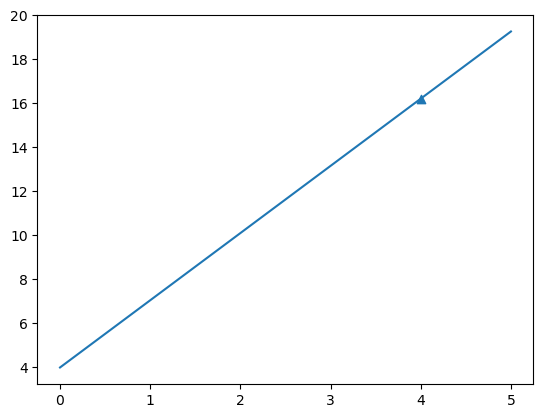

In [112]:
#사이킷 런 리니어 리그레션
from sklearn.linear_model import LinearRegression

LR = LinearRegression()
LR.fit(X, y)
print(LR.coef_, LR.intercept_)

LR.predict(x_new)
theta_best_lin = np.c_[LR.intercept_, LR.coef_].reshape(-1, 1)
y_predict_lin = x_new_b.dot(theta_best_lin)
plt.plot([0, 5], [0 * LR.coef_[0] + LR.intercept_, 5 * LR.coef_[0] + LR.intercept_])

plt.scatter(4, 16.2, marker="^")
plt.show()